# SME0821: Mini-Avaliação 3

**Author: Ada Maris Pereira Mário**

## Questão 1

Demonstre que a variância do estimador de Kaplan-Meier é dada por:

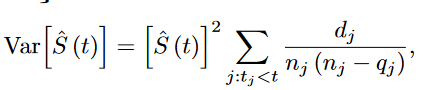

em que dj é o número de falhas em tj e nj é o número de indivíduos sob risco em tj .

O estimador de Kaplan-Meier é dado por:

\begin{equation}
\hat{S}(t) = \prod_{j:t_j < t} \left(1 - \frac{d_j}{n_j}\right)
\end{equation}

Vamos utilizar o Método Delta para o cálculo de sua variância aplicando o log do estimador e, depois, repetir estes passos:

\begin{equation}
\text{Var}(\log(\hat{S}(t))) \sim \frac{1}{\hat{S}(t)^2} \text{Var}(\hat{S}(t))
\end{equation}

\begin{equation}
\text{Var}(\hat{S}(t)) \sim \hat{S}(t)^2 \text{Var}(\log(\hat{S}(t)))
\end{equation}

Pode-se mostrar que a variância do somatório abaixo é igual ao somatório de cada variância de seus termos:

$$\log \hat{S}(t) = \sum_{i: t_i \leq t} \log (1 - \hat{h}_i)$$

Assim:

$$\text{Var}(\hat{S}(t)) \sim \hat{S}(t)^2 \text{Var}\left( \sum_{i: t_i \leq t} \log(1 - \hat{h}_i) \right)$$
$$\sim \hat{S}(t)^2 \sum_{i: t_i \leq t} \text{Var}(\log(1 - \hat{h}_i))$$

Mais uma vez o Método Delta:

$$\text{Var}(\hat{S}(t)) \sim \hat{S}(t)^2 \sum_{i: t_i \leq t} \left(\frac{\partial \log(1 - \hat{h_i})}{\partial \hat{h_i}}\right)^2 \text{Var}(\hat{h_i})$$
$$= \hat{S}(t)^2 \sum_{i: t_i \leq t} \left(\frac{1}{1 - \hat{h_i}}\right)^2 \frac{\hat{h_i} (1 - \hat{h_i})}{n_i}$$
$$= \hat{S}(t)^2 \sum_{i: t_i < t + n_{i}} \frac{\hat{h}_i}{(1 - \hat{h_i})^2}$$
$$= \hat{S}(t)^2 \sum_{i: t_{i} < t + n_{i}} \frac{d_{i}}{n_{i} (n_{i} - d_{i})}$$







## Questão 2

Com base na teoria e o seguinte gráfico, responda às seguintes perguntas:

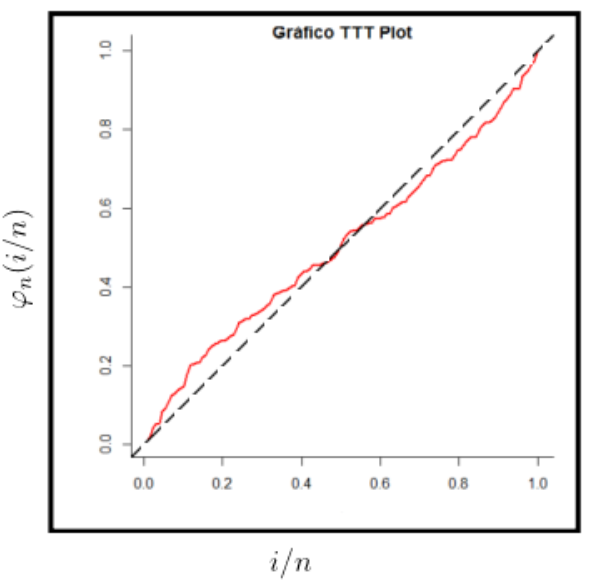

a) Qual é o objetivo principal do TTT plot na análise de sobrevivência?

O objetivo principal do TTT plot é distinguir entre uma função de risco constante, uma função de risco crescente ou uma função de risco decrescente. Se o gráfico mostrar que os dados são quase côncavos e principalmente acima da linha de 45°, isso indica que os dados são de uma distribuição com uma função de risco crescente. Se o gráfico mostrar que os dados são quase convexos e principalmente abaixo da linha de 45°, isso indica que os dados são de uma distribuição com uma função de risco decrescente. Se o gráfico mostrar os dados aleatoriamente em torno da linha de 45°, isso indica que os dados são de uma distribuição com uma função de risco constante (ex. uma distribuição exponencial).

b) Qual é o significado do eixo x no TTT plot? E o eixo y?



No eixo x temos o número acumulado de eventos de interesse ($\hat{F(t)}$). No eixo y temos o tempo total em teste escalonado entre 0 e 1.

c) O que representa a linha traçada no gráfico?

É a linha de referência, em que a falha é constante. Ela representa o cenário em que os eventos de interesse ocorrem em uma taxa constante ao longo do tempo.

d) Como você interpretaria o ponto onde a linha atinge 0.7 no eixo y?

Representa a quantidade de falhas que ocorreram em 70% do tempo total

e) O que pode ser interpretado/inferido com base na inclinação da linha no TTT plot?

A linha do gráfico apresentado está muito próxima da linha de referência, sendo quase constante. Entretanto, vê-se que até mais ou menos metade do tempo o risco é levemente crescente (acima da linha de 45°) e após ele é levemente decrescente (abaixo da linha de 45°).

## Questão 3

Considere os dados de sobrevivência abaixo (em semanas) para 2 tratamentos. 6MP (novo tratamento) e placebo (controle). Os dados do grupo controle foram completos e os dados do grupo tratamentos foram censurados progressivamente.

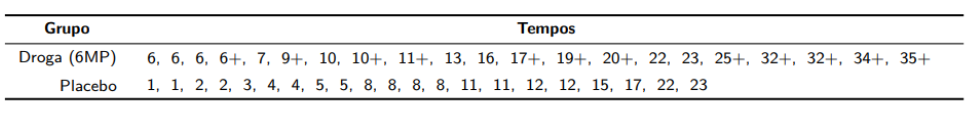

In [ ]:
#@title Dados
require(survival)

# Dados
tratamento <- c(6,6,6,6,7,9,10,10,11,13,16,17,19,20,22,23,25,32,32,34,35)
placebo <- c(1,1,2,2,3,4,4,5,5,8,8,8,8,11,11,12,12,15,17,22,23)
censura_tratamento <- c(1,1,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0)

# Criando os dados de sobrevivência
dados_tratamento <- data.frame(tempo = tratamento, evento = censura_tratamento)
dados_placebo <- data.frame(tempo = placebo, evento = rep(1, length(placebo)))

# Definindo a fórmula correta
formula_tratamento <- Surv(tempo, evento) ~ 1
formula_placebo <- Surv(tempo, evento) ~ 1

# Ajustando os modelos de Kaplan-Meier
ajuste_tratamento <- survfit(formula_tratamento, data = dados_tratamento)
ajuste_placebo <- survfit(formula_placebo, data = dados_placebo)

a) Encontrar os estimadores produto limite, Kaplan-Meier e Nelson Alaen para os dois grupos.

b) Encontrar as variâncias dos estimadores de Kaplan-Meier e intervalos de confiança.


In [ ]:
#@title Kaplan-Meier: Grupo Tratamento
summary(ajuste_tratamento)

Call: survfit(formula = formula_tratamento, data = dados_tratamento)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    6     21       3    0.857  0.0764        0.720        1.000
    7     17       1    0.807  0.0869        0.653        0.996
   10     15       1    0.753  0.0963        0.586        0.968
   13     12       1    0.690  0.1068        0.510        0.935
   16     11       1    0.627  0.1141        0.439        0.896
   22      7       1    0.538  0.1282        0.337        0.858
   23      6       1    0.448  0.1346        0.249        0.807

In [ ]:
#@title Kaplan-Meier: Grupo Controle
summary(ajuste_placebo)

Call: survfit(formula = formula_placebo, data = dados_placebo)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     21       2   0.9048  0.0641      0.78754        1.000
    2     19       2   0.8095  0.0857      0.65785        0.996
    3     17       1   0.7619  0.0929      0.59988        0.968
    4     16       2   0.6667  0.1029      0.49268        0.902
    5     14       2   0.5714  0.1080      0.39455        0.828
    8     12       4   0.3810  0.1060      0.22085        0.657
   11      8       2   0.2857  0.0986      0.14529        0.562
   12      6       2   0.1905  0.0857      0.07887        0.460
   15      4       1   0.1429  0.0764      0.05011        0.407
   17      3       1   0.0952  0.0641      0.02549        0.356
   22      2       1   0.0476  0.0465      0.00703        0.322
   23      1       1   0.0000     NaN           NA           NA

In [ ]:
#@title Nelson Alaen: Grupo Tratamento
nelson_tratamento <- survfit(Surv(tempo, evento) ~ 1, data = dados_tratamento, type = "fleming-harrington")
summary(nelson_tratamento)

Call: survfit(formula = Surv(tempo, evento) ~ 1, data = dados_tratamento, 
    type = "fleming-harrington")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    6     21       3    0.867  0.0715        0.737        1.000
    7     17       1    0.817  0.0828        0.670        0.997
   10     15       1    0.765  0.0927        0.603        0.970
   13     12       1    0.704  0.1035        0.527        0.939
   16     11       1    0.642  0.1111        0.458        0.902
   22      7       1    0.557  0.1249        0.359        0.864
   23      6       1    0.471  0.1317        0.273        0.815

In [ ]:
#@title Nelson Alaen: Grupo Controle
nelson_placebo <- survfit(Surv(tempo, evento) ~ 1, data = dados_placebo, type = "fleming-harrington")
summary(nelson_placebo)

Call: survfit(formula = Surv(tempo, evento) ~ 1, data = dados_placebo, 
    type = "fleming-harrington")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     21       2   0.9092  0.0612      0.79674        1.000
    2     19       2   0.8183  0.0821      0.67218        0.996
    3     17       1   0.7716  0.0898      0.61425        0.969
    4     16       2   0.6809  0.0995      0.51135        0.907
    5     14       2   0.5903  0.1048      0.41673        0.836
    8     12       4   0.4229  0.1030      0.26239        0.682
   11      8       2   0.3294  0.0991      0.18261        0.594
   12      6       2   0.2360  0.0902      0.11157        0.499
   15      4       1   0.1838  0.0840      0.07509        0.450
   17      3       1   0.1317  0.0745      0.04348        0.399
   22      2       1   0.0799  0.0603      0.01820        0.351
   23      1       1   0.0294  0.0368      0.00252        0.342

c) Faça o gráfico das curvas de sobrevivência estimadas.

Resposta em (e)

d) Calcule o tempo médio de vida dos pacientes para os dois grupos.

In [ ]:
#@title Tempo Médio de Vida
media_vida_tratamento <- mean(tratamento)
print(paste("Tempo médio de vida para o grupo de tratamento: ", media_vida_tratamento))

# Tempo médio de vida para o grupo de tratamento (apenas não censurados)
media_vida_tratamento_nc <- mean(tratamento[censura_tratamento == 1])
print(paste("Tempo médio de vida para o grupo de tratamento (apenas não censurados): ", media_vida_tratamento_nc))

# Tempo médio de vida para o grupo placebo
media_vida_placebo <- mean(placebo)
print(paste("Tempo médio de vida para o grupo controle: ", media_vida_placebo))


[1] "Tempo médio de vida para o grupo de tratamento:  17.0952380952381"
[1] "Tempo médio de vida para o grupo de tratamento (apenas não censurados):  12.1111111111111"
[1] "Tempo médio de vida para o grupo controle:  8.66666666666667"


e) Com apoio computacional obtenha todos os estimadores e faça os gráficos.

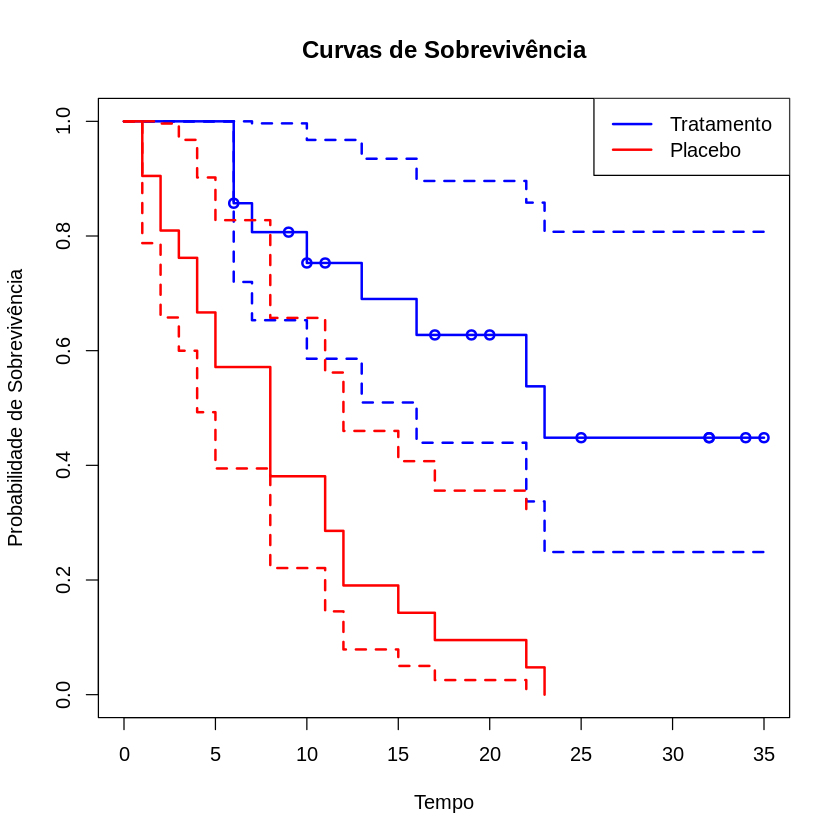

In [ ]:
#@title Curvas de Sobrevivência: Kaplan-Meier
# Plotando as curvas de sobrevivência
plot(ajuste_tratamento, col = "blue", main = "Curvas de Sobrevivência",
     xlab = "Tempo", ylab = "Probabilidade de Sobrevivência",
     xlim = c(0, 35), ylim = c(0, 1), lwd = 2, conf.int = TRUE)
lines(ajuste_placebo, col = "red", lwd = 2, conf.int = TRUE)
legend("topright", legend = c("Tratamento", "Placebo"),
       col = c("blue", "red"), lty = 1, lwd = 2)


for(i in 1:length(tratamento)) {
  if(censura_tratamento[i] == 0) {
    points(tratamento[i], summary(ajuste_tratamento)$surv[which.max(summary(ajuste_tratamento)$time[summary(ajuste_tratamento)$time <= tratamento[i]])], pch = 1, col = "blue", lwd = 2)
  }
}

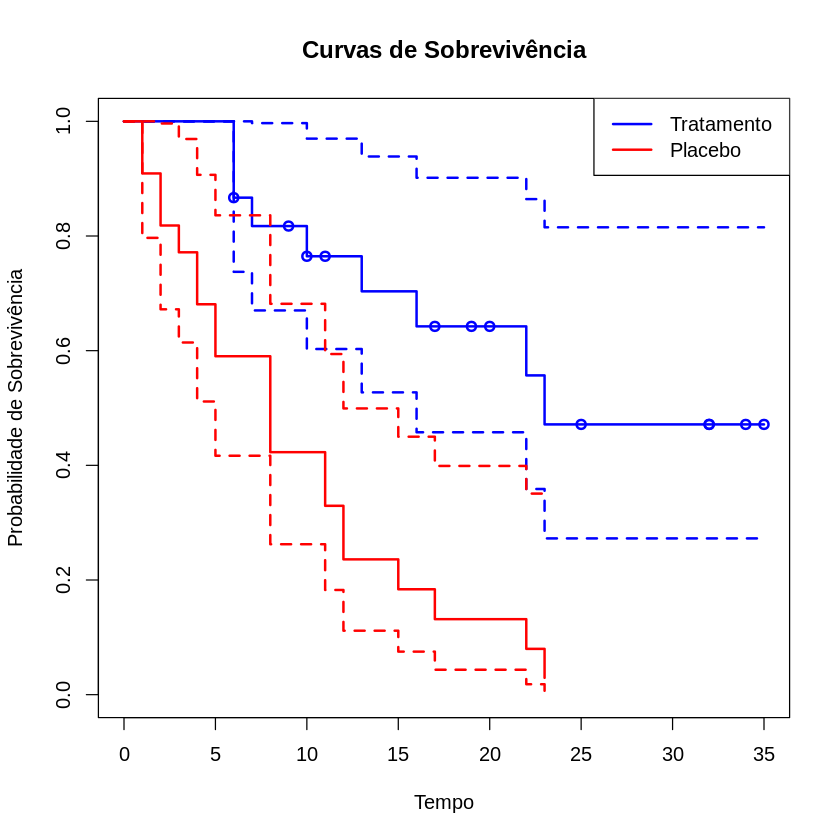

In [ ]:
#@title Curvas de Sobrevivência: Nelson Alaen
# Plotando as curvas de sobrevivência
plot(nelson_tratamento, col = "blue", main = "Curvas de Sobrevivência",
     xlab = "Tempo", ylab = "Probabilidade de Sobrevivência",
     xlim = c(0, 35), ylim = c(0, 1), lwd = 2, conf.int = TRUE)
lines(nelson_placebo, col = "red", lwd = 2, conf.int = TRUE)
legend("topright", legend = c("Tratamento", "Placebo"),
       col = c("blue", "red"), lty = 1, lwd = 2)


for(i in 1:length(tratamento)) {
  if(censura_tratamento[i] == 0) {
    points(tratamento[i], summary(nelson_tratamento)$surv[which.max(summary(nelson_tratamento)$time[summary(nelson_tratamento)$time <= tratamento[i]])], pch = 1, col = "blue", lwd = 2)
  }
}

f) Faça uma conclusão para os resultados encontrados.

Observa-se que as estimativas pontuais das curvas de sobrevivência não se coincidem, coincidindo apenas um pouco seus intervalos de confiança, o que denota a diferença certa entre os grupos, com o Grupo Tratamento tendo uma sobrevivência mais longeva que o Grupo Controle

g) Construa o gráfico TTT plot considerando os grupos droga e placebo. Em relação à função de risco associada a cada um desses grupos, o que podemos concluir?

In [ ]:
install.packages("EstimationTools")
library(tidyverse)
library(EstimationTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



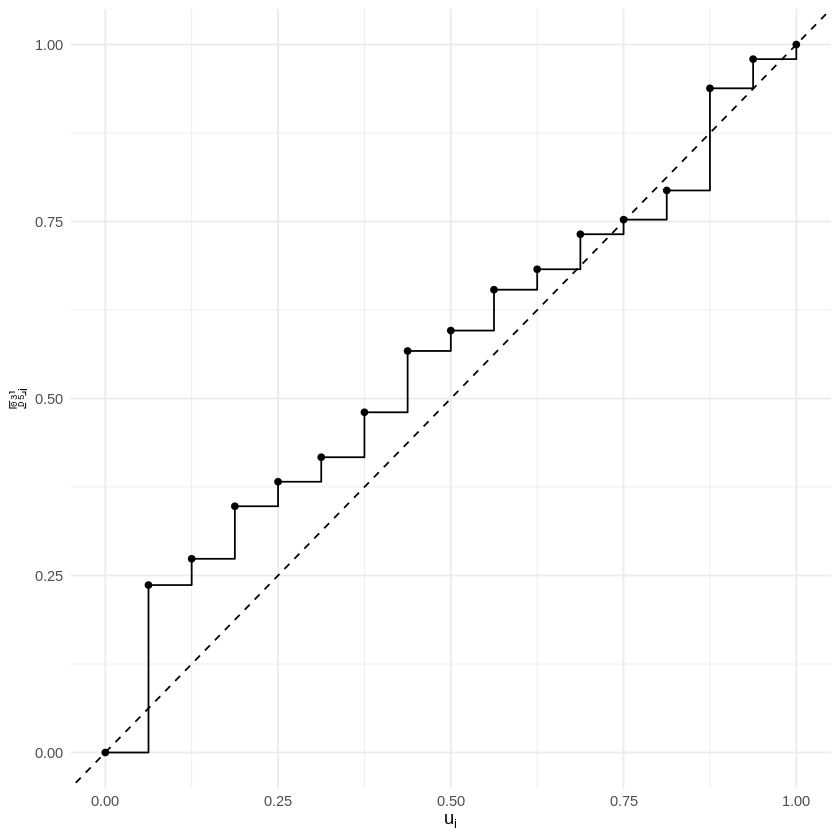

In [ ]:
#@title TTT Plot: Grupo Tratamento

TTT = TTTE_Analytical(Surv(tratamento, censura_tratamento)~1, method='censored')

dadosTTT = tibble(
  x = TTT$`i/n`,
  y = TTT$phi_n
)

G =
  dadosTTT %>%
  ggplot(aes(x=x, y=y)) +
  geom_step() +
  geom_point() +
  geom_abline(slope=1, intercept=0, linetype="dashed") +
  lims(y=c(0,1), x=c(0,1)) +
  labs(x = bquote(u[i]), y = bquote(varphi[i])) +
  theme_minimal(); G


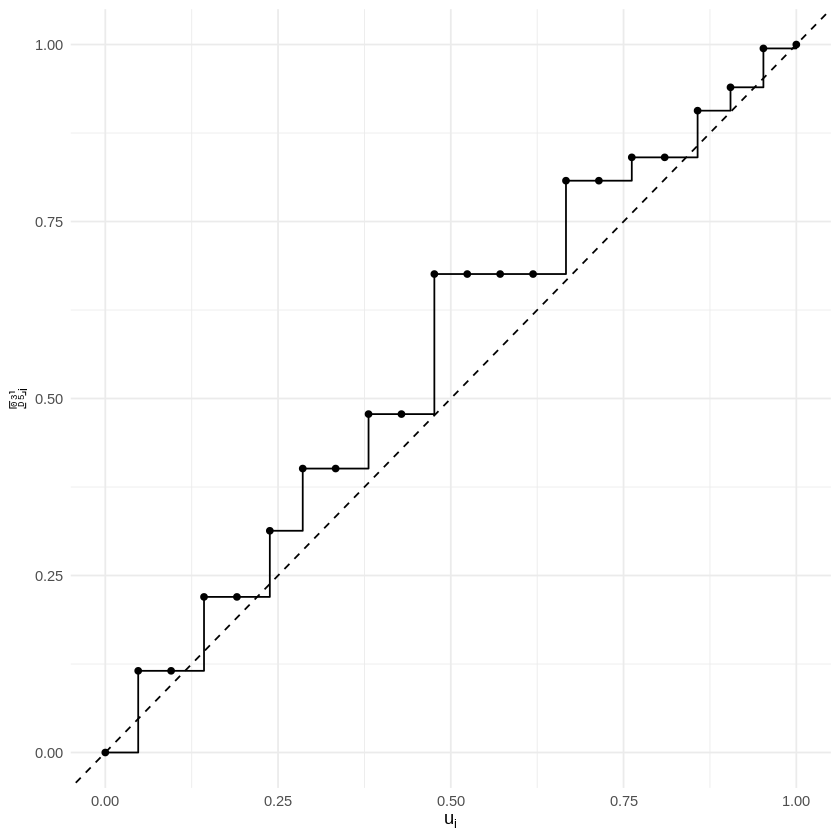

In [ ]:
#@title TTT Plot: Grupo Controle
TTT = TTTE_Analytical(placebo~1, method='Barlow')

dadosTTT = tibble(
  x = TTT$`i/n`,
  y = TTT$phi_n
)

G =
  dadosTTT %>%
  ggplot(aes(x=x, y=y)) +
  geom_step() +
  geom_point() +
  geom_abline(slope=1, intercept=0, linetype="dashed") +
  lims(y=c(0,1), x=c(0,1)) +
  labs(x = bquote(u[i]), y = bquote(varphi[i])) +
  theme_minimal(); G

Observa-se que em ambos os riscos estão um pouco acima da linha de referência, indicando risco levemente crescente. Entretanto, vê-se que até cerca de 50% do tempo total em teste o Grupo Tratamento apresenta um acúmulo mais lento de eventos de interesse. Ademais, em 75% do tempo total o risco de tal grupo se torna decrescente, voltando ao padrão anterior por volta de 0,875. Desse modo, conclui-se que o tratamento de fato tem impacto tanto no risco quanto na curva de sobrevivência (como visto nas questões anteriores), em comparação com o Grupo Controle.